# Homework 2: Imaging and Inverse Problems

**Name:**

**Email:**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)
rc("font", family = "serif")
rc("figure",figsize=(9,6))
rc("figure",facecolor="white")
%config InlineBackend.figure_format = 'retina'
from skimage.transform import radon, iradon
from scipy.signal import convolve2d,convolve

## Problem 1 

**Part a.** 
Pick a topic or problem in applied math that you might be interested in working on for your final project. Write a few sentences about a *forward problem* in this area.

**Part b.** Now describe a related *inverse problem*. Clearly state the known and unknown quantities of the inverse problem. 

**Part c.** What data might you use to address this inverse problem? Do you expect a unique answer given your data?

**Part d.** Find some data on the internet and plot it (or a subset of it). What sort of funtion (e.g. linear, quadratic, exponential, etc.) might you fit to this data? why is that sort of function a good choice?  

Hints: To find a useful dataset you might start looking on [kaggle](https://www.kaggle.com/datasets) or on some of the pages listed [here](http://iacs-courses.seas.harvard.edu/courses/cs205/resources.html) under the heading "Data Sources". 

## Problem 2

The Radon transform of an object is given below. Suppose the Radon transform of this object is the same for every angle θ; that is, taking the Radon transform at any angle gives the projection below. What could the object be? Sketch the object. Then generate an image of the object as an array and plot the Radon transform for a few angles. 

<img src="https://github.com/Hekstra-Lab/AM50-Student-2019/blob/master/Topic2/radon1d.jpg?raw=true" width=500 height=400>

## Problem 2 - Using Convolutions to solve and inverse problem

The movie file `trajectory.mp4` shows a ball moving through space with constant acceleration. The goal of this problem is to estimate the ball's equation of motion given only the frames from the movie; the movie is 150 frames long and these images are stored in `img_data.npy`

### Part a.

If you watch the movie or look at individual frames you will see that the images are quite noisy. To be able to track the ball, we will need to denoise the images. Using a $5 \times 5$ gaussian filter, denoise all the images in the dataset.

### Part b.  Finding the ball.

We now need to analyze the denoised images to find the ball. If we think that the ball is mostly bright pixels on dark background, we want to find a cutoff pixel value, called a threshold value, that only the pixels in the ball are greatier than and the background values are less than. We will do this on a pixel by pixel basis by setting all pixels below a threshold value to 0 and all the pixels above the threshold to 1. First, make a histogram of the pixel values for both a noisy and a denoised image, using a log scale for $y$ axis. Looking at the denoised histogram, choose a threshold and apply it to a test image. Fine tune the threshold value as needed until you can effectively isolate the ball from the background. 

In [ ]:
# plt.hist(noisy.ravel(),bins = np.linspace(-.9,1.1,20))
# plt.yscale('log')
# plt.show()
# plt.hist(denoised.ravel(),bins = np.linspace(-.9,1.1,20))
# plt.yscale("log")
# plt.show()

### Part c. Center of "mass"
The center of mass of an image is given by 

$$ {\bf r}_{CM} = \frac{\sum_i m_i {\bf r}_i}{\sum_i m_i}$$

where ${\bf r_i} = (x_i, y_i)$ are the indices of pixel $i$ and $m_i$ is the value of pixel $i$. What we would like to know is the center of mass of just the ball in order to know its position. After denoising the ball should be the only thing left in the image, so the center of mass of the image and ball should be the same. Thus if we know the center of mass of the denoised image then we know the position of the ball.

Write a function that computes the center of mass of a single thresholded image. 


Good arguments to this function would be:

```
def center_of_mass(image, threshold):
    #code goes here
    
    return [x_pos, y_pos]
```


Hint: to do this with numpy code you will need to use [`np.meshgrid`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) as demonstrated below to have arrays containing the coordinates you need.

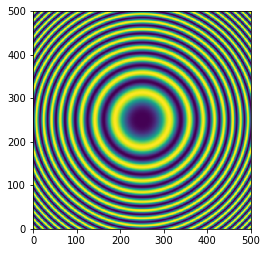

In [15]:
X,Y = np.meshgrid(np.arange(500),np.arange(500)) #these are the right size for the 
# To evaluate some f(x,y), i just call f(X,Y)
def f(x,y):
    return np.sin((.02*(x-250))**2 +(.02*(y-250))**2)**2
plt.imshow(f(X,Y),origin='lower')
plt.show()

### Part d. Computing trajectory


Apply the function from part C to each of the images in the data set and plot the computed trajectory of the center of mass of the ball. 


### Part e. Finding the velocity and acceleration - a final convolution application

Given the center of mass position as a function of time, ${\bf r}(t)$, you can find the velocity and acceleration as a function of time by taking the first and second derivatives with respect to time. velocity is just speed with a direction, so in this case we can define the velocity as ${\bf v} = $[speed in x, speed in y] and acceleration can be broken up similarly. In terms of derivatives of ${\bf r}$ they can be written as:


$$ {\bf v} = \frac{d{\bf r}(t)}{dt}$$
$$ {\bf a} = \frac{d^2{\bf r}(t)}{dt^2}.$$

For a particle with constant acceleration, the position can be described by 

$$ {\bf r}(t) = {\bf r}_0 + {\bf v}_0 t + \frac{1}{2}{\bf a}t^2.$$

Where $ {\bf r}_0$ and ${\bf v}_0$ are the intial positions and velocities respectively.

So if we'd like to know if the ball we tracked fits this equation we need to determine its velocity and acceleration as derivatives of its position. To do this we need to understand how to generate derivatives from discrete functions.


Given a discretized version of a function

$$f_i = f(x_i)$$

for $i = 1,...N$ we can approximate derivatives at $x_i$ using the following formulae

\begin{align} \frac{df}{dx}\biggr\rvert_{x_i} =  f'(x_i) &\approx \frac{f_{i-1} - f_{i+1}}{2 \Delta x}\\
 \frac{d^2f}{dx^2}\biggr\rvert_{x_i} =  f''(x_i) &\approx \frac{f_{i+1} - 2f_i + f_{i-1}}{(\Delta x)^2}.
\end{align}

where $\Delta x = x_{i+1}-x_{i}$. Before implementing these will notice however, that the trajectory is not entirely smooth so using these formula will give unreliable estimates of the derivatives. 

1. Apply a 1D gaussian filter (use the 5 pixel formula) to smooth the trajectory ${\bf r}(t).$
2. Implement the first and second derivative approximations as convolutions and compute ${\bf r}_0$ ,${\bf v}_0$ and  ${\bf a}$.
  * When implementing the derivative formulae use $\Delta x = \Delta t = 1.$ 
  * You should also pass the argument `mode='valid'` to `convolve` to avoid edge artifacts. Note that this will require your smoothed position, velocity, and acceleration arrays to be different sizes than the positions array that results from measuring the center of mass from the data.
3. On a single plot show the measured trajectory of the ball and predicted trajectory using the parameters you estimated. 

In [1]:
# Hint to calculate $vy_0$ use the command below
# It assumes vel is an array of shape (144,2) and that vel[:,1] is the y velocity
# from scipy.stats import linregress
# v0y = linregress(t0[3:-3], vel[:,1]).intercept

### Part f.

You should notice that your calculated trajectory is a better fit at the beginning of the time interval rather than the end. Why is this? Which paramter values do you think were over or under estimated and why? 

### Part g.

What if we had asked you to track more than one ball, how would you consider modifying your approach to deal with this? Or, would your approach still work, if so why?